# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

Write the problem statement and objectives here


### Data Dictionary

Mention the data dictionary here

### Let us start by importing the required libraries

In [2]:
# Write your code here to import necessary libraries for the project
import numpy as np
import pandas as pd

# import libraries for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
#  Write your code here to read the data
df = pd.read_csv('C:/Users/e412629/Desktop/xml_training/foodhub_order.csv')

In [4]:
# Write your code here to view the first 5 rows
# Display first few rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Write your code here
rows, columns = df.shape
print(rows,columns)


1898 9


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Write your code here
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Write your code here
# Determine if there is any missing data.
missing_values = df.isnull().sum()

# Output if there are any missing data points in the dataset.
if missing_values.sum() > 0:
    print("There are missing data points in the Food Hub Project dataset.")
else:
    print("There are no missing data points in the Food Hub Project dataset.")

There are no missing data points in the Food Hub Project dataset.


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Write your code here
df.describe()
df.describe(include='all').T
foodprep_min_value = df['food_preparation_time'].min()
foodprep_avg_value = df['food_preparation_time'].mean()
foodprep_max_value = df['food_preparation_time'].max()

print('Food preparation time statistics in minutes:')
print('Minimum:', foodprep_min_value)
print('Average:', foodprep_avg_value)
print('Maximum:', foodprep_max_value)

Food preparation time statistics in minutes:
Minimum: 20
Average: 27.371970495258168
Maximum: 35


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# Write the code here
# Count the number of orders that have not been rated (rating = 'Not given').
no_ratings = df['rating'].value_counts()['Not given']

# Print the number of orders that have not been rated.
print('The number of orders not rated are ' + str(no_ratings))

# Calculate the percentage of orders that have not been rated.
no_ratings_impact = round((no_ratings/rows)*100, 2)
print(f'Unrated orders have a {no_ratings_impact}% impact on the dataset.')

The number of orders not rated are 736
Unrated orders have a 38.78% impact on the dataset.


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

There are 1,898.
There are 1,200 customers.
There are 178 restaurants.
There are 14 cuisines.


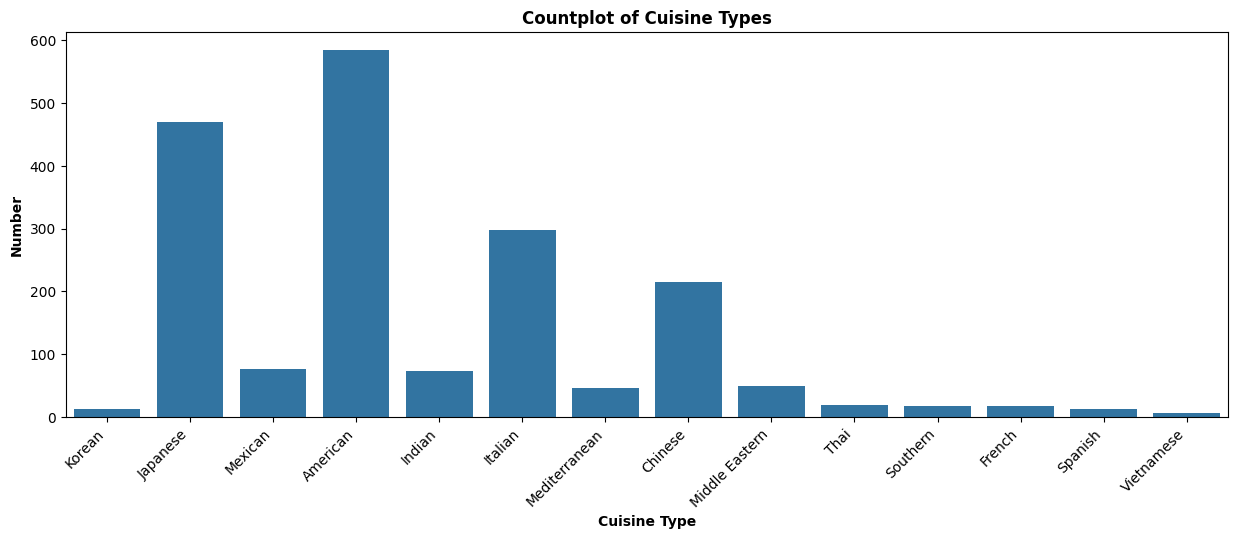

In [10]:
# Write the code here
print(f'There are {df["order_id"].nunique():,}.')
# Check for unique customers in the dataset.
customer_ids = df['customer_id'].nunique()
print(f'There are {customer_ids:,} customers.')
# Check for unique restaurants in the dataset.
restaurants = df['restaurant_name'].nunique()
print(f'There are {restaurants:,} restaurants.')
# Check unique cuisine types in the dataset.
cuisine_types = df['cuisine_type'].nunique()
print(f'There are {cuisine_types:,} cuisines.')
# Create countplot for the different cuisine types.
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')

# Set the labels, title, position, fontsize and alignment for the output.
plt.title('Countplot of Cuisine Types', fontsize=12, fontweight='bold')
plt.xlabel('Cuisine Type', fontsize=10, fontweight='bold')
plt.ylabel('Number', fontsize=10, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Show plot.
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

          Restaurant Name  Number of Orders
              Shake Shack               219
        The Meatball Shop               132
        Blue Ribbon Sushi               119
Blue Ribbon Fried Chicken                96
                     Parm                68


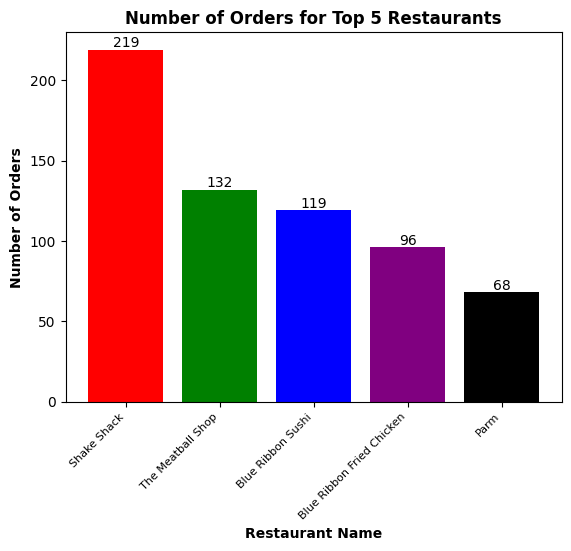

In [11]:
# Create a new DataFrame, top_restaurants_df and retrieve the top 5 restaurants with the highest number of orders.
top_restaurants_df = df['restaurant_name'].value_counts().reset_index()

# Print readable column names for the DataFrame foodhub_df.
top_restaurants_df.columns = ['Restaurant Name', 'Number of Orders']

# Print only the top 5 restaurants without the index column.
print(top_restaurants_df.head(5).to_string(index=False))

# To better visualize the number of orders for the top 5 restaurants, a bar chart was created.

# Create a list of colors to use for the bar chart restaurant names.
colors = ['red', 'green', 'blue', 'purple', 'black']

# Create bar chart of the top 5 restaurants with the highest number of orders.
restaurant_bars = plt.bar(top_restaurants_df['Restaurant Name'].head(5), top_restaurants_df['Number of Orders'].head(5),color=colors)

# Set the labels, title, position, fontsize and alignment for the bar chart output.
plt.xlabel('Restaurant Name', fontsize=10, fontweight='bold')
plt.ylabel('Number of Orders', fontsize=10, fontweight='bold')
plt.title('Number of Orders for Top 5 Restaurants', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8, horizontalalignment='right')

# Add order numbers to the histogram bars for readability.
for restaurant_bar in restaurant_bars:
    yval = restaurant_bar.get_height()
    plt.text(restaurant_bar.get_x() + restaurant_bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

# Display the bar chart.
plt.show()

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [12]:
# Write the code here
# Get the most popular cuisine type and the number of orders.

# Filter the DataFrame to only include orders made on weekends.
weekend_orders_df = df[df['day_of_the_week'] == 'Weekend']

# Get the most popular cuisine type and the number of orders for weekends.
cuisine_counts = weekend_orders_df['cuisine_type'].value_counts()
most_popular_cuisine = cuisine_counts.idxmax()
number_of_orders = cuisine_counts.max()

# Print simple output of the most popular cuisine type and the number of orders for weekends.
print(f'The most popular cuisine type on weekends is {most_popular_cuisine} with {number_of_orders} orders.')

The most popular cuisine type on weekends is American with 415 orders.


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

The percentage of orders costing more than $20 is 29%.


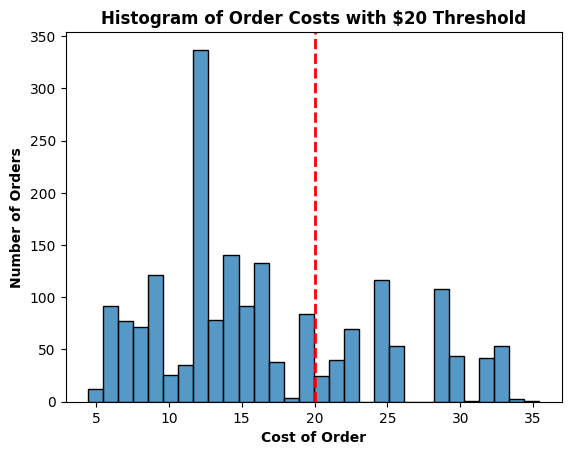

In [13]:
# Write the code here
# Query df DataFrame for orders with a cost greater than $20.
expensive_orders = df[df['cost_of_the_order'] > 20]

# Calculate the % of expensive orders vs total orders.
percentage_expensive_orders = (len(expensive_orders)/len(df)) * 100
print(f"The percentage of orders costing more than $20 is {percentage_expensive_orders:.0f}%.")

# Visualizing the expensive vs total orders a histogram provides an easier view to consume.
sns.histplot(df['cost_of_the_order'], bins=30, edgecolor='black')

# Set the labels, title, position, fontsize and alignment for the bar chart output.
# Added vertical line at $20 for reference.
plt.axvline(20, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Cost of Order', fontsize=10, fontweight='bold')
plt.ylabel('Number of Orders', fontsize=10, fontweight='bold')
plt.title('Histogram of Order Costs with $20 Threshold', fontsize=12, fontweight='bold')

# Show histogram.
plt.show()


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

The mean order delivery time is  24 minutes.


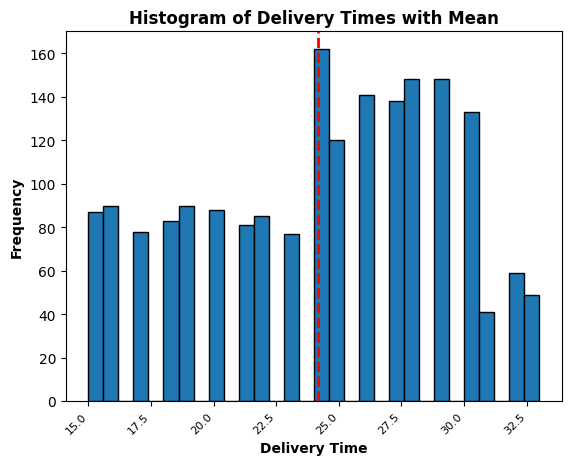

In [14]:
# Write the code here
# Query the df DataFrame for orders mean delivery time.
mean_delivery_time = df['delivery_time'].mean()

# Print the mean order delivery time and round it to the nearest minute. 
print(f'The mean order delivery time is {mean_delivery_time: .0f} minutes.')

# Visualize the delivery times using a histogram to show the distribution of delivery times.
delivery_times = df['delivery_time']

# Calculate the mean delivery time.
mean_delivery_time = delivery_times.mean()

# Create a histogram of the delivery times.
plt.hist(delivery_times, bins=30, edgecolor='black')

# Add a vertical line to indicate the mean delivery time.
plt.axvline(mean_delivery_time, color='red', linestyle='dashed', linewidth=2)

# Set the labels, title, position, fontsize and alignment for the bar chart output.
plt.xlabel('Delivery Time', fontsize=10, fontweight='bold')
plt.ylabel('Frequency', fontsize=10, fontweight='bold')
plt.title('Histogram of Delivery Times with Mean', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8, horizontalalignment='right')

# Show the plot
plt.show()

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [15]:
# Write the code here
# Select the top 3 customers with the highest number of orders using the value_counts() method
# and the nlargest() method to retrieve the top 3 customers.
top_customers = df['customer_id'].value_counts().nlargest(3)

# Convert the series to a DataFrame named top_customers_df and rename the columns for readability.
top_customers_df = top_customers.reset_index()
top_customers_df.columns = ['Customer ID', 'Number of Orders']

# Output the top_customers_df DataFrame as a table.
print('Top 3 customers:')
print(top_customers_df.to_string(index=False))

Top 3 customers:
 Customer ID  Number of Orders
       52832                13
       47440                10
       83287                 9


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


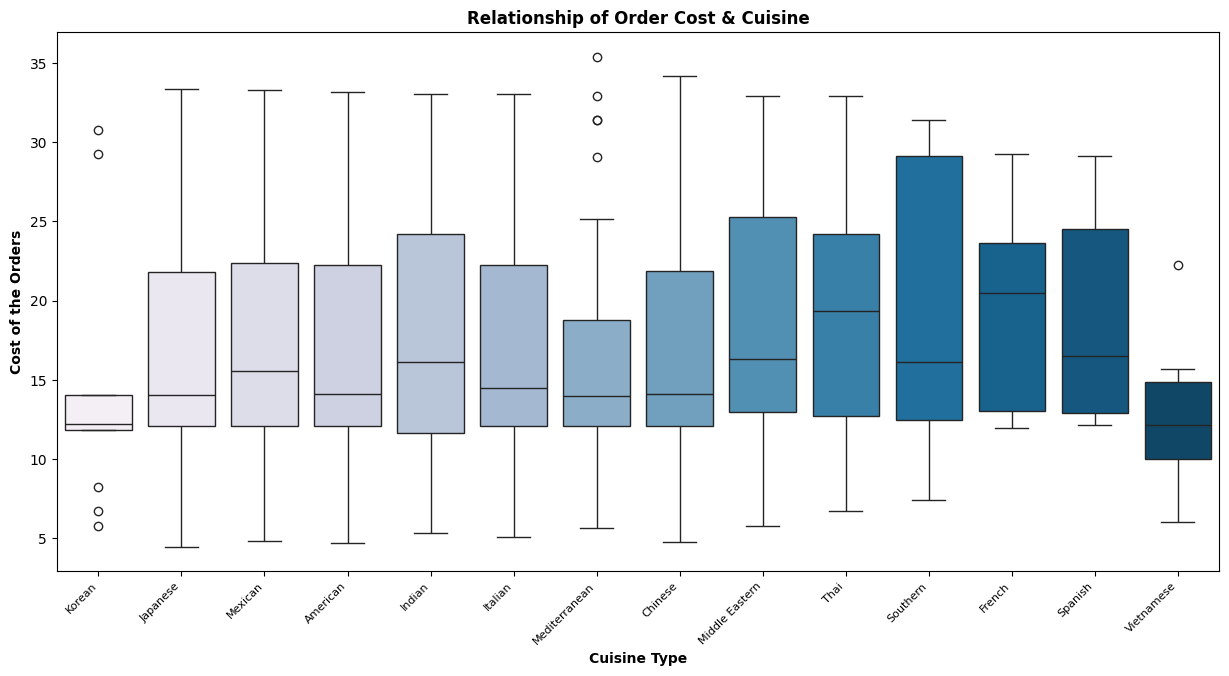

In [16]:
# Write the code here
# Examine the relationship between cost of the order and cuisine type.
plt.figure(figsize=(15,7))

# Create a boxplot to show the relationship between cost of the order and cuisine type.
sns.boxplot(x = 'cuisine_type', y = 'cost_of_the_order', data = df, palette = 'PuBu', hue = 'cuisine_type')

# Set the labels, title, position, fontsize and alignment for the bar chart output.
plt.xlabel('Cuisine Type', fontsize=10, fontweight='bold')
plt.ylabel('Cost of the Orders', fontsize=10, fontweight='bold')
plt.title('Relationship of Order Cost & Cuisine', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=8, horizontalalignment='right')
plt.xticks(rotation = 45)

# Show the plot.
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

C:\Users\e412629\AppData\Local\Temp\6\ipykernel_17392\2085560230.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3.rating.replace("Not given",0,inplace=True)
C:\Users\e412629\AppData\Local\Temp\6\ipykernel_17392\2085560230.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

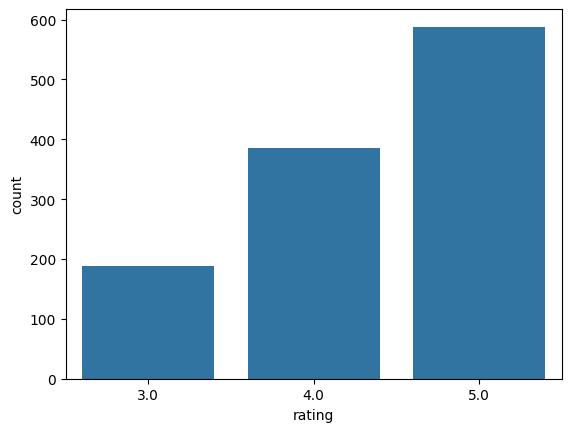

        restaurant_name  rating
0            'wichcraft     5.0
1             67 Burger     5.0
2    Anjappar Chettinad     5.0
3           Asuka Sushi     5.0
4                Balade     5.0
..                  ...     ...
134              Hibino     4.0
135       DuMont Burger     4.0
136    Pepe Rosso To Go     4.0
137          Sarabeth's     4.0
138           Rye House     4.0

[139 rows x 2 columns]


np.float64(4.328125)

In [22]:
# Write the code here
df3=df.copy()
df3.rating.replace("Not given",0,inplace=True)
df3.rating=pd.to_numeric(df3.rating)
df3.rating.replace(0,np.nan,inplace=True)
df3.rating.count()
sns.countplot(data=df3,x='rating')
plt.show()
#returns subset of restaurants with mean rating greater than or equal to 4
df4=df3.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False).reset_index()
print(df4[df4.rating>=4])
#returns the top-five restaurants by total number of orders with ratings
df3.groupby('restaurant_name')['rating'].count().sort_values(ascending=False).reset_index().head()
#returns the mean rating of all orders placed at Shake Shack
df3[df3['restaurant_name']=='Shake Shack'].rating.mean()
#returns the mean rating of all orders placed at The Meatball Shop
df3[df3['restaurant_name']=='The Meatball Shop'].rating.mean()
#returns the mean rating of all orders placed at Blue Ribbon Sushi
df3[df3['restaurant_name']=='Blue Ribbon Sushi'].rating.mean()
#returns the mean rating of all orders placed at Blue Ribbon Fried Chicken
df3[df3['restaurant_name']=='Blue Ribbon Fried Chicken'].rating.mean()

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [23]:
# Write the code here
df5 = df[df.cost_of_the_order>20]
amount1 = df5.cost_of_the_order.sum()*.25
df6=df[df.cost_of_the_order<=20]
amount2=df6[df6.cost_of_the_order>5].cost_of_the_order.sum()*.15
net_revenue = amount1 + amount2
print(round(net_revenue,2))

6166.3


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [24]:
# Write the code here
df['total_time']=df['food_preparation_time']+df['delivery_time']
round(len(df[df.total_time>60])/len(df)*100,1)

10.5

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

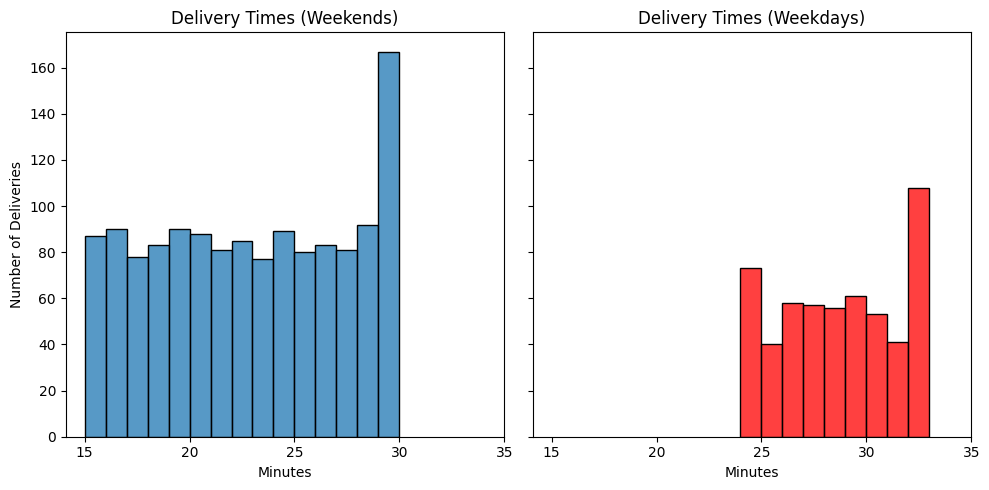

22.47
28.34


In [25]:
# Write the code here
#creates a new dataset which includes only orders placed on the weekend
df7=df[df.day_of_the_week=='Weekend']
#creates a new dataset which includes only orders placed on weekdays
df8=df[df.day_of_the_week=='Weekday']
#plots two histogram, one each for delivery times during weekdays and weekends
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)
sns.histplot(data=df7, x='delivery_time', ax=axes[0], binwidth=1, label='Weekend')
sns.histplot(data=df8, x='delivery_time', ax=axes[1], binwidth=1, label='Weekday', color='r')
axes[0].set(xlabel='Minutes')
axes[0].set(ylabel='Number of Deliveries')
axes[0].set(title='Delivery Times (Weekends)')
axes[0].set(xticks=[15,20,25,30,35])
axes[1].set(xlabel='Minutes')
axes[1].set(title='Delivery Times (Weekdays)')
axes[1].set(xticks=[15,20,25,30,35])
plt.tight_layout()
plt.show()
#returns the mean delivery time of weekend orders
weekend_dtime=round(df7.delivery_time.mean(),2)
print(weekend_dtime)
#returns the mean delivery time of weekday orders
weekday_dtime=round(df8.delivery_time.mean(),2)
print(weekday_dtime)

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  